## News Trends

### 오태건(20224071)

In [1]:
# MVP (Minimum Viable Product)

In [1]:
import json
import requests
import pandas as pd 
import matplotlib.pyplot as plt

from config import *

In [22]:
# python dict
query = {
  "query": {
    "match": {
      "title": "삼성전자"
    }
  },
  "size": 0,
  "aggs": {
    "group_by_date": {
      "date_histogram": {
        "field": "created_at",
        "interval": "day"
      }
    }
  }
}

In [23]:
# dict to json 
query = json.dumps(query)

In [24]:
headers = {
    'Content-Type': 'application/json'
}

In [25]:
resp = requests.get(
    f"{ELASTICSEARCH_URL}/news/_search",
    headers=headers,
    data = query,
    auth = ELASTICSEARCH_AUTH,
)

In [26]:
resp.status_code

200

In [27]:
results = resp.json()

In [28]:
buckets = results['aggregations']['group_by_date']['buckets']

In [29]:
df = pd.DataFrame(buckets)

In [30]:
df['date'] = pd.to_datetime(df['key_as_string'])

In [31]:
df = df.set_index('date')

In [32]:
df = df.loc['2023-08-01':]

In [33]:
plt.rcParams['figure.figsize'] = (10, 4)

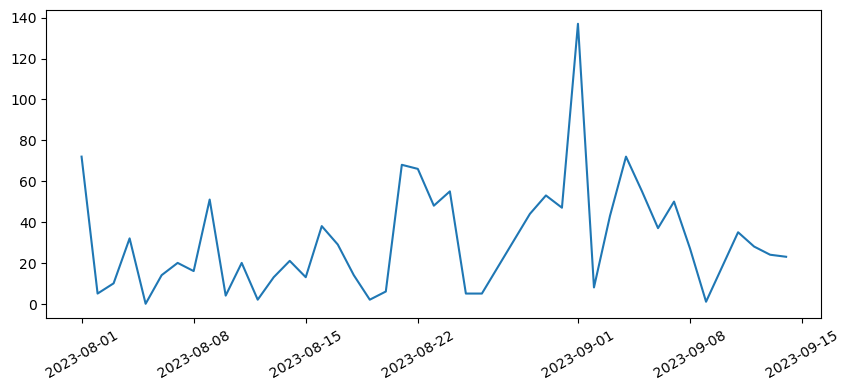

In [34]:
plt.plot(df['doc_count'])
plt.xticks(rotation=30)
plt.show()